<a href="https://colab.research.google.com/github/ChairaWandau/MLHomeworks/blob/main/ML_LW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа №5
Студентка Самсонова Валерия, группа М8О-107М-22

##Часть 1
Генератор тестовых данных

Подключаем необходимые библиотеки

In [159]:
import math
import copy
import numpy as np
import random
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
from sklearn.mixture import GaussianMixture

Равномерное распределение

In [65]:
def Linear(Start, End):
    return random.random() * (End-Start) + Start

def LinearData(DataSize, Start, End):
    x = []
    for i in range(DataSize):
      x.append(Linear(Start, End))
    return x

Нормальное распределение

In [39]:
def Normal(M, D):
    n = 12
    x = 0
    for i in range (n):
      x = x + random.random()
    return D * (12/n)**(1/2) * (x - n/2) + M

def NormalData(DataSize, M, D):
    x = []
    for i in range(DataSize):
      x.append(Normal(M, D))
    return x

Три горба

In [85]:
def ThreePeaksData(N, m1, d1, m2, d2, m3, d3):
    x = []
    for i in range(N):
        r = random.random()
        if r > 2/3:
          x.append(Normal(m1,d1))
        elif r > 1/3:
          x.append(Normal(m2,d2))
        else:
          x.append(Normal(m3,d3))
    return x

##Часть 2
Реализация метода Парзена-Розенблатта

In [139]:
#Различные ядерные функции: квартическая, Епанечников, Гаусса, треугольная и прямоугольная
def Quartic(u):
    return 15/16*((1-u**2)**2)

def Epanechnikov(u):
    return 0.75*(1-u**2)

def Gaussian(u):
    return ((2 * math.pi)**(-1/2)) * np.exp(-1/2 * (u**2))

def Triangle(u):
    return 1-abs(u)

def Rectangular(u):
    return 1/2*abs(u)

def ParzenRosenblatt(x, data, h):
    p = 0
    for i in data:
        p = p + Gaussian((x - i)/h)/ (len(data)*h)
    return p

##Часть 3
Восстановление плотности в виде картинки

Восстановление плотности линейного распределения с параметрами Start = 0, End = 1


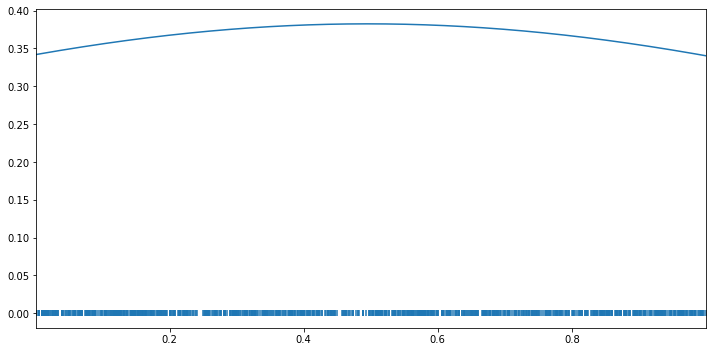

Восстановление плотности нормального распределения с параметрами M = 0, D = 1


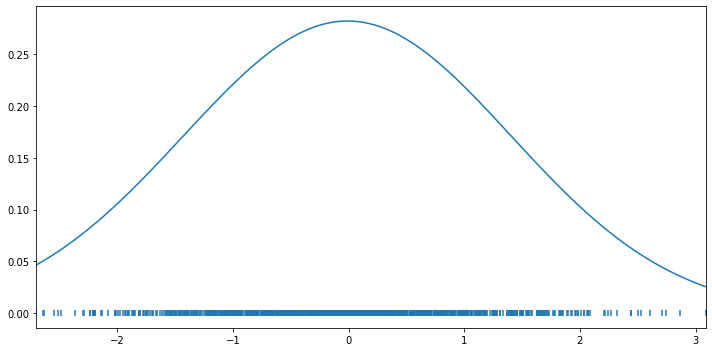

Восстановление плотности распределения "три горба" с параметрами M1 = -8, D1 = 1, M2 = 8, D2 = 2, M3 = 1, D3 = 6


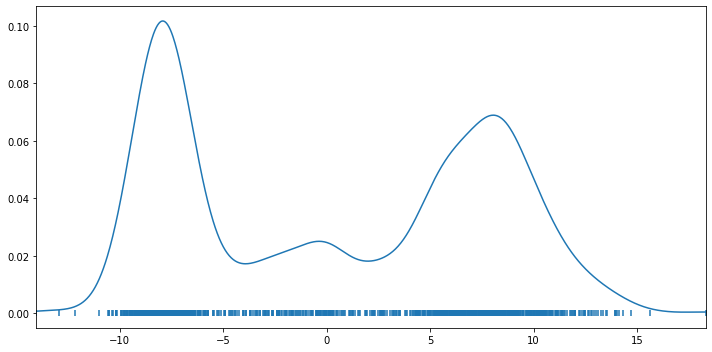

In [134]:
#Количество точек
DataSize = 1000

def Plot(DataSize, data):
  plt_min = min(data)
  plt_max = max(data)
  x = np.linspace(plt_min, plt_max, DataSize)
  Points = np.zeros((DataSize))
  # Создание графика
  fig, ax = plt.subplots(figsize=(10,5))
  ax.plot(x, ParzenRosenblatt(x, data, h=1))
  ax.scatter(data, Points, marker = "|")
  # Оформление
  ax.set_xlim((plt_min, plt_max))
  plt.tight_layout()
  # Вывод графика на экран
  plt.show()

# Изобразим график 1
Start = 0;
End = 1;
lin_dat = LinearData(DataSize, Start, End)
print(f'Восстановление плотности линейного распределения с параметрами Start = {Start}, End = {End}')
Plot(DataSize, lin_dat)
# Изобразим график 2
M=0
D=1
nor_dat = NormalData(DataSize, M, D)
print(f'Восстановление плотности нормального распределения с параметрами M = {M}, D = {D}')
Plot(DataSize, nor_dat)
# Изобразим график 3
M1=-8
D1=1
M2=8
D2=2
M3=1
D3=6
tp_dat = ThreePeaksData(DataSize, M1, D1, M2, D2, M3, D3)
print(f'Восстановление плотности распределения "три горба" с параметрами M1 = {M1}, D1 = {D1}, M2 = {M2}, D2 = {D2}, M3 = {M3}, D3 = {D3}')
Plot(DataSize, tp_dat)

##Часть 4
Оптимизация ширины окна методом leave one out

In [164]:
def LeaveOneOut(data,h):
    loo = 0
    for i in range(len(data)):
        loo = loo - math.log(ParzenRosenblatt(data[i],copy.copy(data[:i] + data[i+1:]),h=h))
    return loo

list = np.arange(0.5, 10.5, 0.5)
loo_min = 100000
h_min = 11
for h in list:
    if LeaveOneOut(tp_dat,h) < loo_min:
        loo_min = LeaveOneOut(lin_dat,h)
        h_min = h
print(f"LOO при стартовом значении: {LeaveOneOut(tp_dat,h)}")

LOO при стартовом значении: 3638.7914146379617


Восстановление плотности распределения "три горба" с параметрами M1 = -8, D1 = 1, M2 = 8, D2 = 2, M3 = 1, D3 = 6


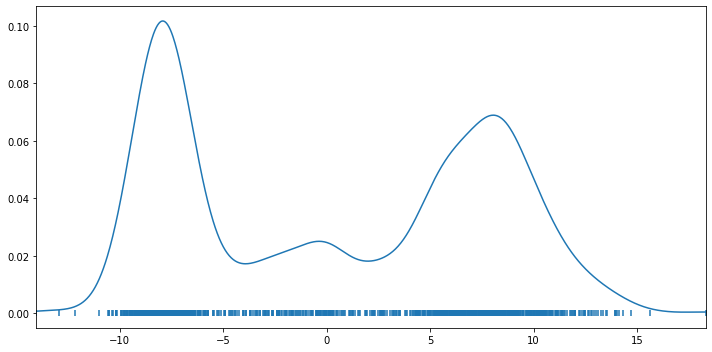

In [165]:
print(f'Восстановление плотности распределения "три горба" с параметрами M1 = {M1}, D1 = {D1}, M2 = {M2}, D2 = {D2}, M3 = {M3}, D3 = {D3}')
Plot(DataSize, tp_dat)

In [166]:
print(f"Оптимальный h по критерию LLO: {h_min}")
print(f"LOO при оптимальном значении: {loo_min}")

Оптимальный h по критерию LLO: 0.5
LOO при оптимальном значении: 507.5531534626658


Восстановление плотности распределения "три горба" с параметрами M1 = -8, D1 = 1, M2 = 8, D2 = 2, M3 = 1, D3 = 6


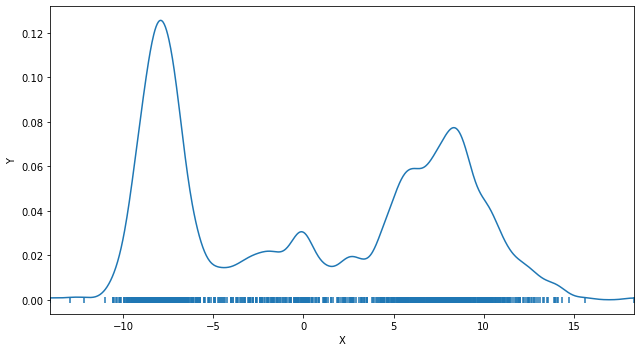

In [167]:
fig, ax = plt.subplots(figsize=(9,5))
plt_min = min(tp_dat)
plt_max = max(tp_dat)
x = np.linspace(plt_min, plt_max, DataSize)
ax.plot(x, ParzenRosenblatt(x, tp_dat, h=h_min))
points = np.zeros((1000))

ax.scatter(tp_dat,points, marker = "|")

# Оформление
ax.set_xlim((plt_min, plt_max))

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
print(f'Восстановление плотности распределения "три горба" с параметрами M1 = {M1}, D1 = {D1}, M2 = {M2}, D2 = {D2}, M3 = {M3}, D3 = {D3}')
plt.show()

##Часть 5
Применение алгоритма из sklearn для сгенерированных данных с двумя и более горбами

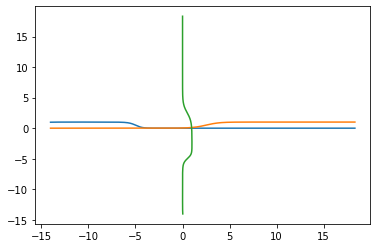

In [168]:
X = np.array(tp_dat).reshape(-1, 1)
gm = GaussianMixture(n_components=3, random_state=0).fit(X)
gm.means_
plt.plot(x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,0],x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,1], gm.predict_proba(np.array(x).reshape(-1, 1))[:,2],x)
plt.show()